In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {
    'n_estimators': [1, 5, 10, 20, 40, 100, 200],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model, param_grid, n_jobs=-1)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200]})

In [15]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [17]:
predictions = grid.predict(X_test)

In [19]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,637,0
1,0,582


In [20]:
grid.best_estimator_.feature_importances_

array([1.49839890e-04, 2.27925634e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.13047534e-03, 4.16894800e-16, 1.46409979e-05,
       1.17248051e-05, 0.00000000e+00, 0.00000000e+00, 1.56963727e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.06399876e-04,
       2.28869401e-03, 5.25949203e-02, 1.78941009e-04, 1.22486265e-02,
       2.19333412e-02, 2.70874528e-03, 6.13639934e-01, 1.14613521e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03866275e-02,
       8.77313584e-03, 0.00000000e+00, 1.21001299e-17, 0.00000000e+00,
       0.00000000e+00, 9.79039242e-18, 0.00000000e+00, 1.07790119e-17,
       2.81977457e-16, 0.00000000e+00, 5.06475499e-18, 0.00000000e+00,
       9.65674375e-04, 5.03495180e-05, 1.31738783e-01, 7.63178337e-03,
       2.88708291e-02, 2.31555887e-03, 2.06631829e-04, 1.13274492e-04,
       2.55931343e-05, 1.43932827e-05, 3.81000883e-02, 1.12820394e-05,
       0.00000000e+00, 0.00000000e+00, 5.88719727e-04, 0.00000000e+00,
      

In [21]:
feat_import = grid.best_estimator_.feature_importances_

In [22]:
imp_feats = pd.DataFrame(feat_import, index=X.columns, columns=['Importance'])

In [23]:
imp_feats

,Importance
cap-shape_c,1.498399e-04
cap-shape_f,2.279256e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,4.261072e-08
habitat_m,1.155481e-16
habitat_p,5.576326e-07
habitat_u,5.416134e-05


In [24]:
imp_feats.sort_values(by='Importance', ascending=False)

,Importance
odor_n,0.613640
stalk-root_c,0.131739
bruises_t,0.052595
stalk-surface-below-ring_y,0.038100
spore-print-color_r,0.034408
...,...
stalk-color-below-ring_e,0.000000
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_p,0.000000
stalk-color-below-ring_w,0.000000


In [25]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064467,0.0,0.0,0.000001,0.000777,0.61364


In [26]:
imp_feats = imp_feats[imp_feats['Importance'] > 0]

In [27]:
imp_feats.sort_values(by='Importance', ascending=False)

,Importance
odor_n,6.136399e-01
stalk-root_c,1.317388e-01
bruises_t,5.259492e-02
stalk-surface-below-ring_y,3.810009e-02
spore-print-color_r,3.440820e-02
...,...
habitat_g,2.440153e-17
gill-color_g,1.210013e-17
gill-color_p,1.077901e-17
gill-color_n,9.790392e-18


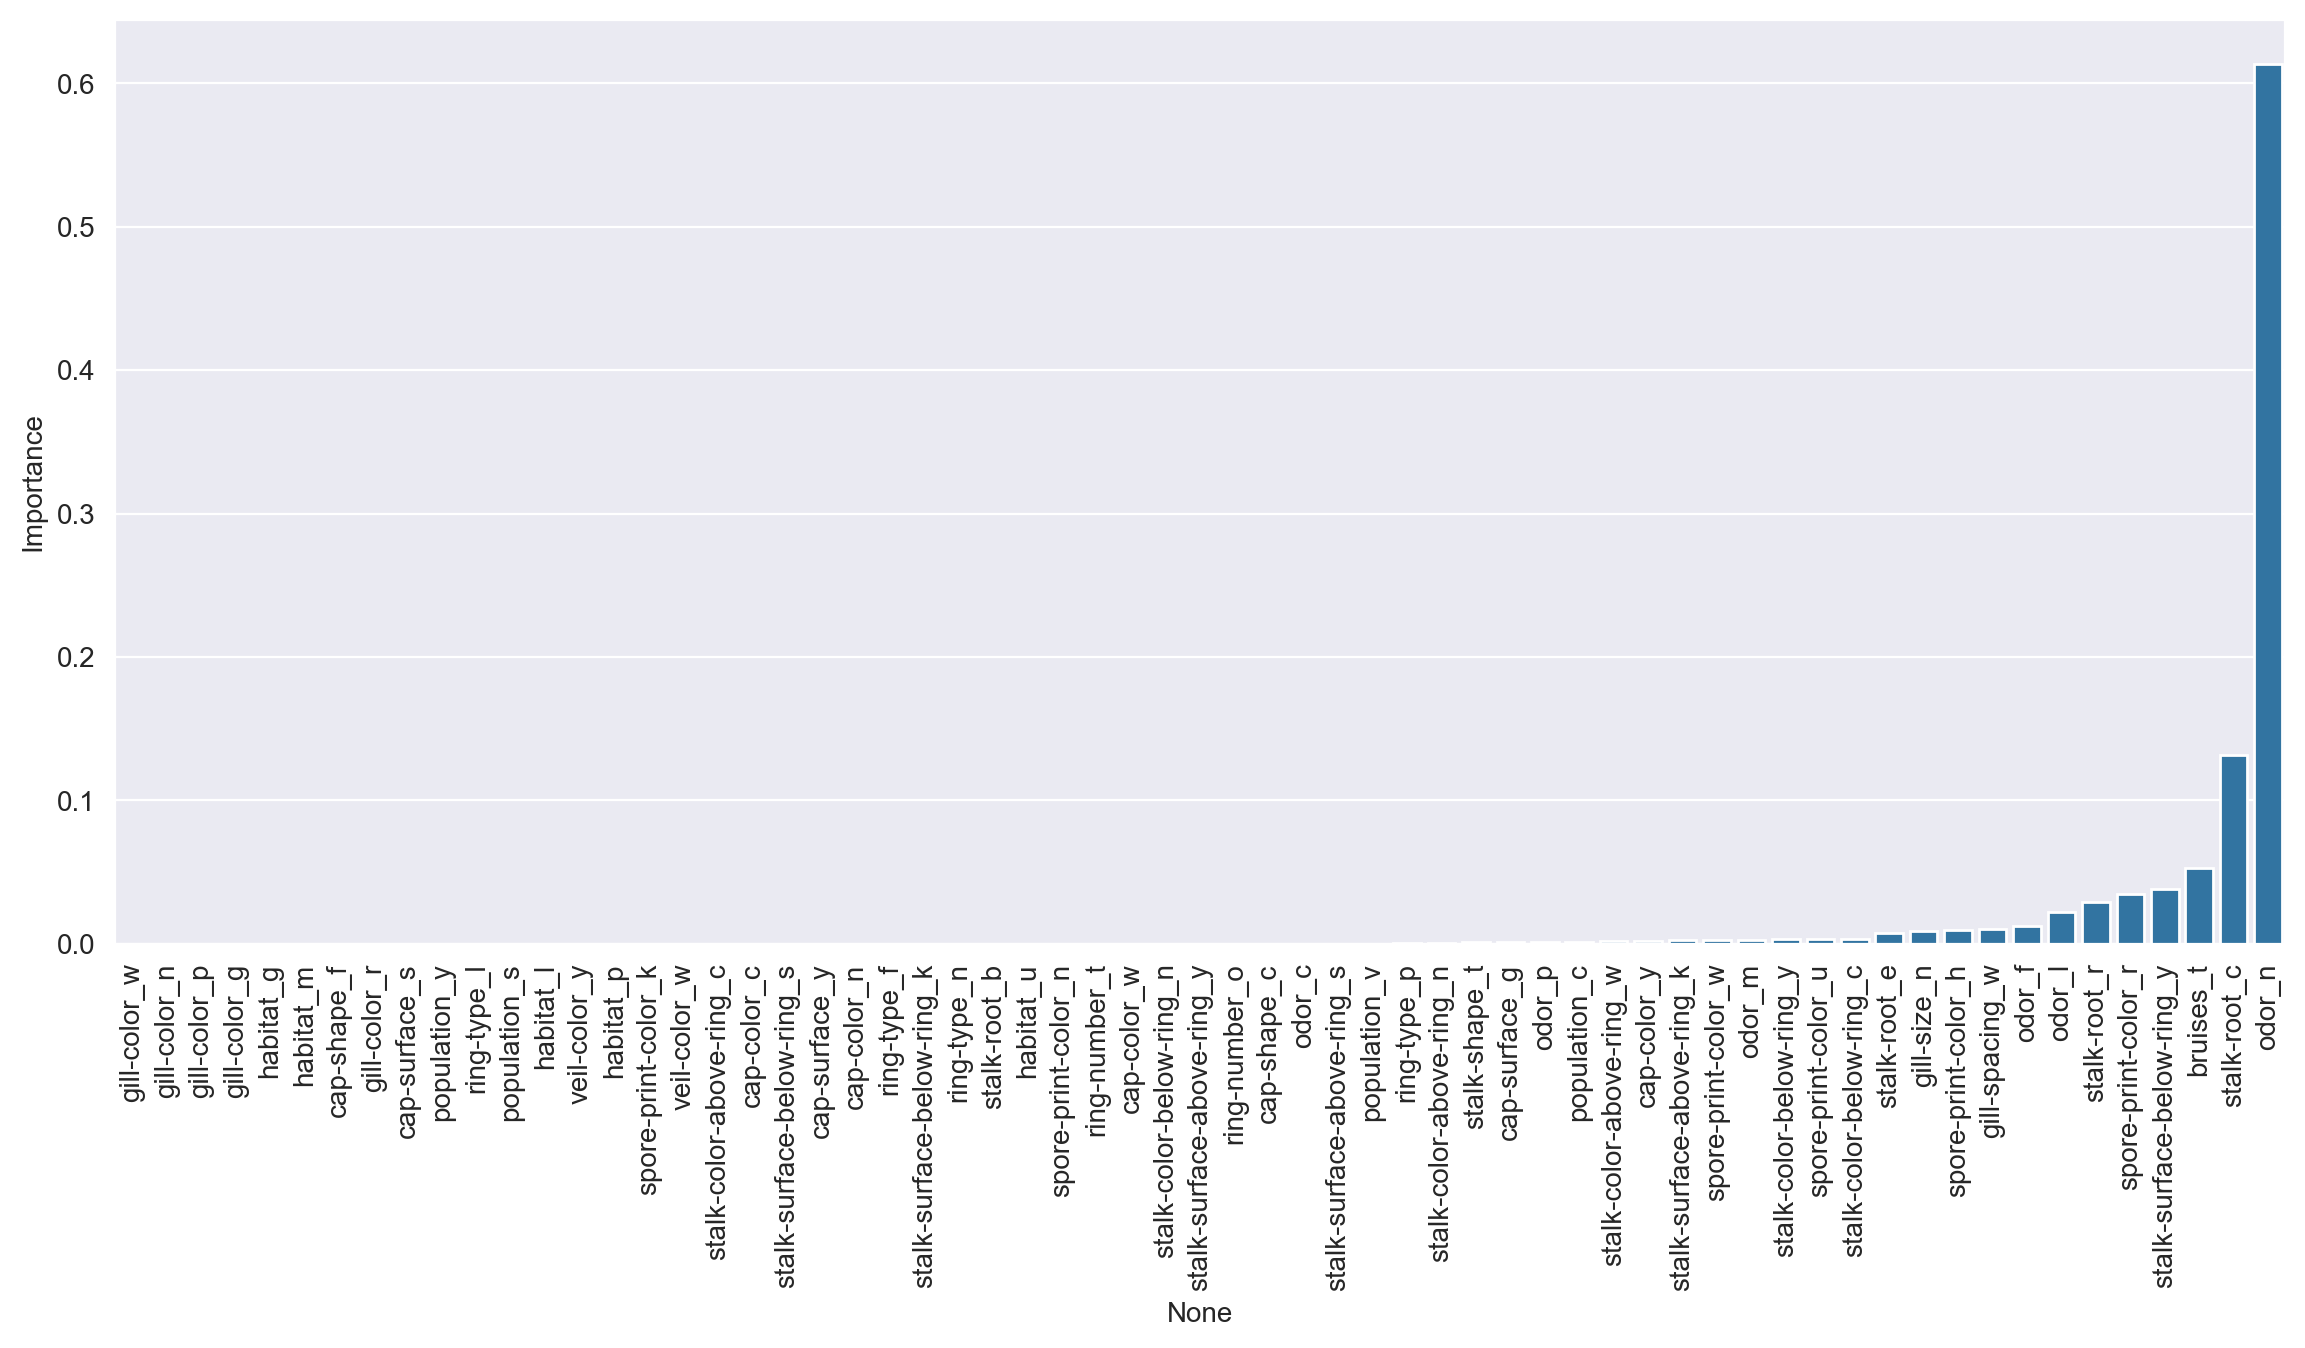

In [28]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);